In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
parkdf_ml = pd.read_csv('parkdf_ml.csv')

In [3]:
parkdf_ml.head()

,PARK,SIZE,BOROUGH,TOTAL
0,PELHAM BAY PARK,2771.75,BRONX,28
1,VAN CORTLANDT PARK,1146.43,BRONX,55
2,ROCKAWAY BEACH AND BOARDWALK,1072.56,QUEENS,80
3,FRESHKILLS PARK,913.32,STATEN ISLAND,1
4,FLUSHING MEADOWS CORONA PARK,897.69,QUEENS,287


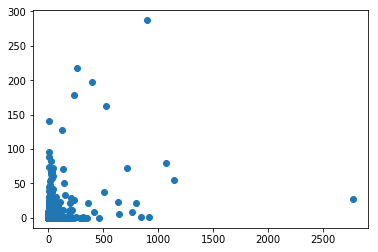

In [4]:
plt.scatter(parkdf_ml["SIZE"],parkdf_ml["TOTAL"])

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = parkdf_ml.SIZE.values.reshape(-1, 1)
y = parkdf_ml.TOTAL.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (1154, 1) (1154, 1)


In [7]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
# Print the coefficient and the intercept for the model


print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[0.0485889]]
y-axis intercept:  [3.70822564]


In [9]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.]]
Max X Value: [[2771.75]]


In [10]:
# Calculate the y_min and y_max using model.predict and x_min and x_max


y_min = model.predict(x_min)
y_max = model.predict(x_max)


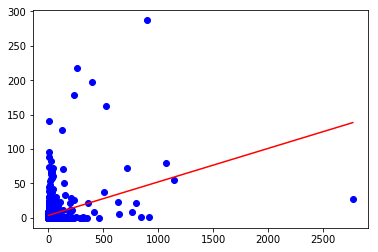

In [11]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]


plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


In [12]:
from sklearn.metrics import mean_squared_error, r2_score
# Use our model to predict a value
# A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 286.26758077592575
R-squared (R2 ): 0.11136755134233178


In [13]:
# Overall Score for the model
model.score(X, y)

0.11136755134233177

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)

In [15]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
model.score(X_test, y_test)

0.18969349768868146